# 00. Inicialização

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

from sklearn.ensemble import RandomForestRegressor #Random Forest para detectar importância de features
from sklearn.preprocessing import LabelEncoder #codifocação de dados categóricos em dados inteiros

%matplotlib inline

In [ ]:
data_path = "/content/drive/MyDrive/MBA/DAS020/ENEM/MICRODADOS_ENEM_2021.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_path, sep=';', encoding = "ISO-8859-1", chunksize=1000000)

In [ ]:
df = pd.concat(df, ignore_index=True)
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [ ]:
#três milhões e trezentos e oitenta e nove mil e oitocentos e trinta e dois
print("Este data set tem" , df.shape[0] ," registros e ",  df.shape[1] , " colunas.")

Este data set tem 3389832  registros e  76  colunas.


In [ ]:
colunas_df = ['TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 
              'TP_ANO_CONCLUIU', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU','TP_ESCOLA','TP_ENSINO',
              'IN_TREINEIRO','TP_LOCALIZACAO_ESC', 'SG_UF_ESC',
              'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 
              'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
              'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
              'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022','Q023', 'Q024', 'Q025']

In [ ]:
dados_df = df.filter(items=colunas_df)

# 01. Tratamentos de dados

In [ ]:
# Adicionando informações sobre as notas
dados_df['NOTA_MEDIA'] = (dados_df['NU_NOTA_CN'] + dados_df['NU_NOTA_CH'] + dados_df['NU_NOTA_LC'] + dados_df['NU_NOTA_MT'] + dados_df['NU_NOTA_REDACAO']) / 5
dados_df['NOTA_TOTAL'] = (dados_df['NU_NOTA_CN'] + dados_df['NU_NOTA_CH'] + dados_df['NU_NOTA_LC'] + dados_df['NU_NOTA_MT'] + dados_df['NU_NOTA_REDACAO'])

In [ ]:
dados_df['NOTA_TOTAL']

0             NaN
1          2577.5
2             NaN
3          3338.0
4          2850.3
            ...  
3389827       NaN
3389828       NaN
3389829       NaN
3389830    3126.8
3389831       NaN
Name: NOTA_TOTAL, Length: 3389832, dtype: float64

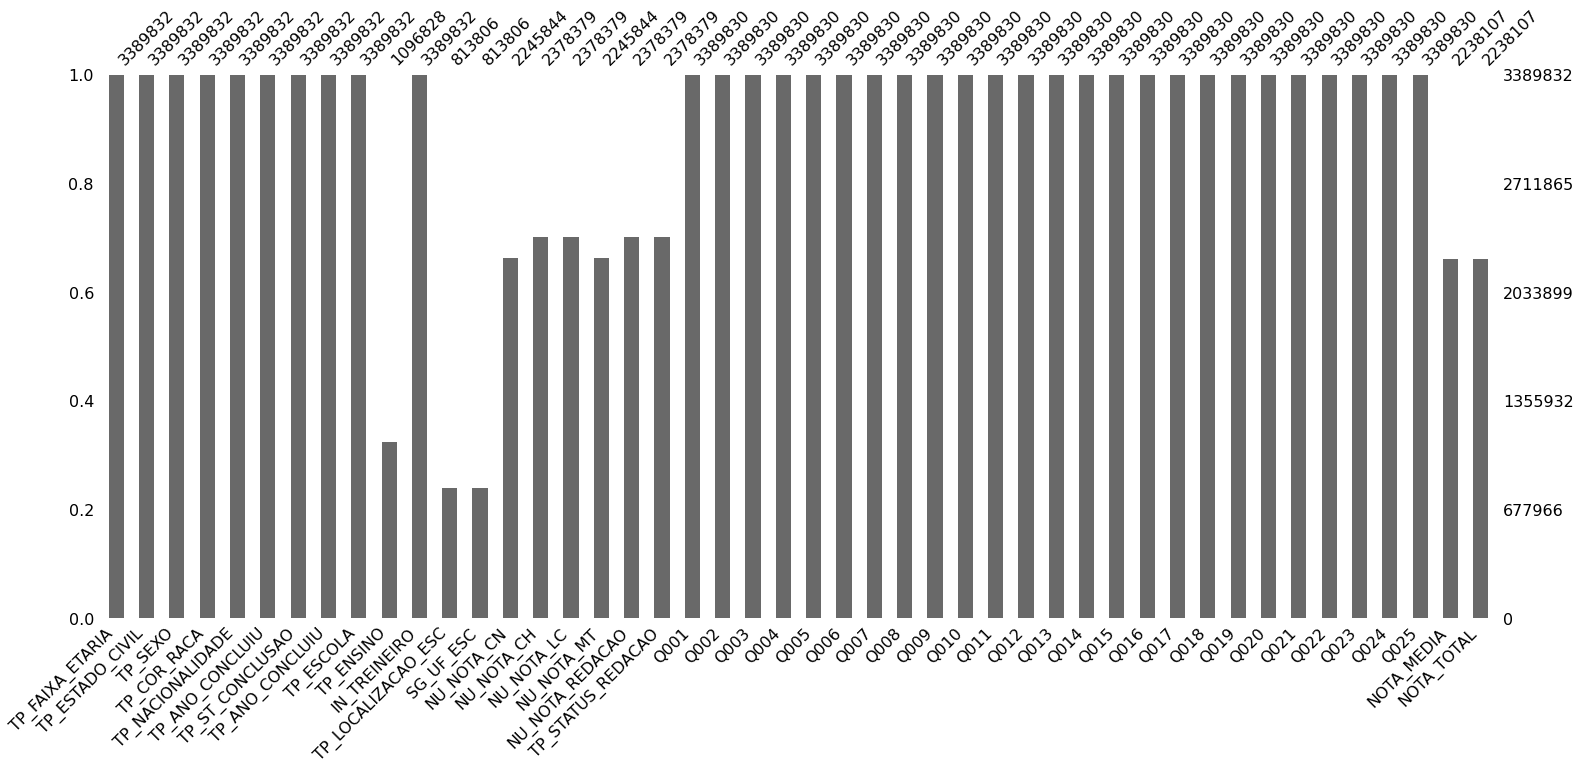

In [ ]:
#Verificar sem tem valores nulos de forma visual
msno.bar(dados_df)

In [ ]:
dados_df = dados_df.dropna(subset=["NOTA_TOTAL"])

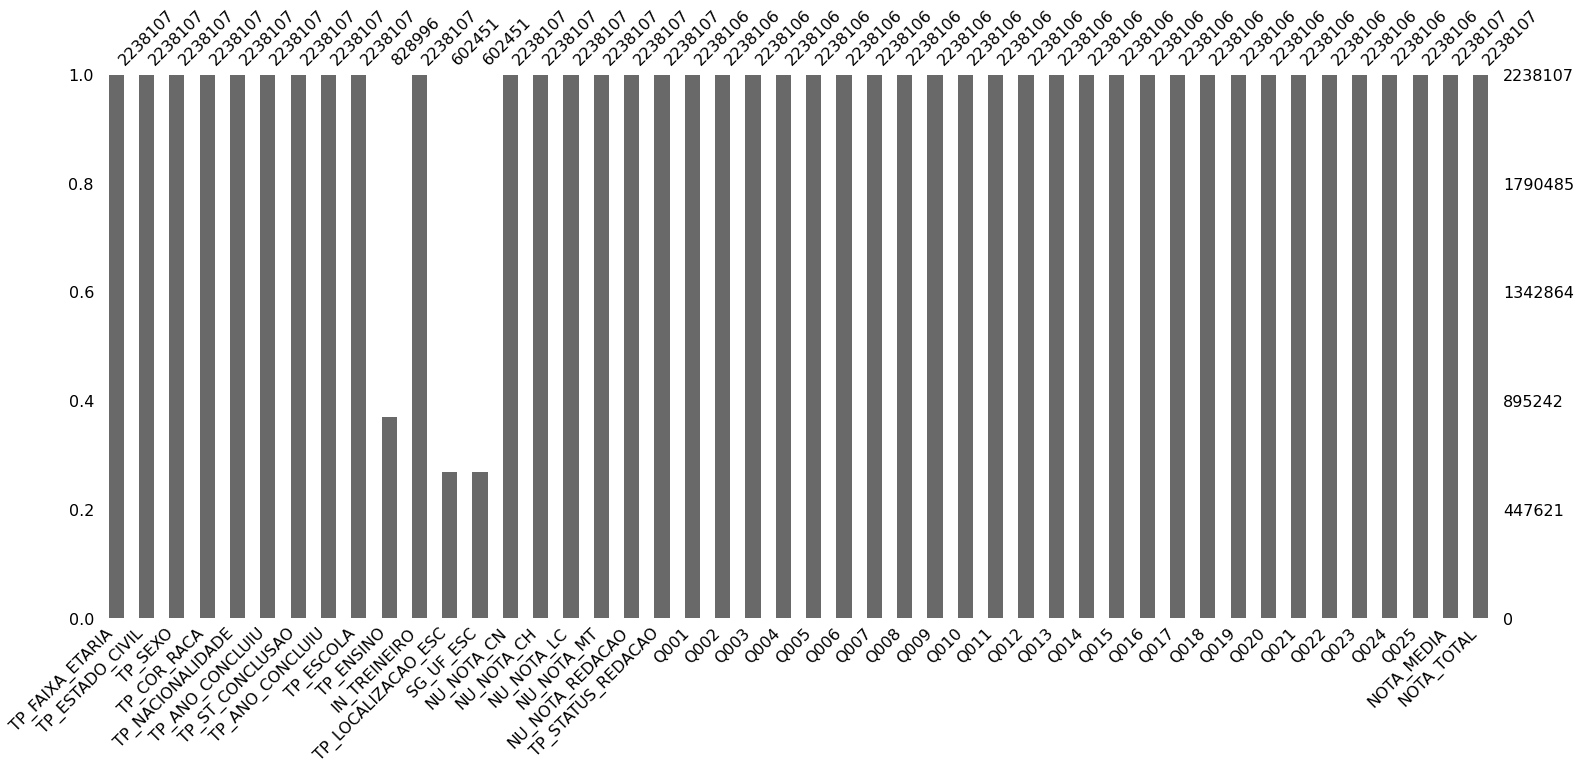

In [ ]:
msno.bar(dados_df)

In [ ]:
print("Dataset Original - Registros" , df.shape[0] ," registros e ",  df.shape[1] , " colunas.")
print("Dataset Tratado  - Registros" , dados_df.shape[0] ," registros e ",  dados_df.shape[1] , " colunas.")

Dataset Original - Registros 3389832  registros e  76  colunas.
Dataset Tratado  - Registros 2238107  registros e  46  colunas.


In [ ]:
dados_df.head()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_MEDIA,NOTA_TOTAL
1,12,1,M,1,1,11,1,11,1,NaN,...,A,B,A,A,C,A,A,A,515.50,2577.5
3,3,1,M,3,1,0,2,0,2,1.0,...,A,B,A,A,B,A,B,B,667.60,3338.0
4,2,1,F,3,1,0,2,0,2,1.0,...,A,B,A,B,E,A,B,B,570.06,2850.3
8,8,1,F,3,1,0,2,0,2,NaN,...,A,B,A,A,B,A,A,B,485.60,2428.0
9,4,1,F,3,1,0,2,0,2,1.0,...,B,C,B,A,C,A,A,B,466.94,2334.7


# 02. Functions

In [ ]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

In [ ]:
def build_table(df, index, colunms):
    df2 = df[index.keys()]

    pieces = []
    for col in df2.columns:
        tmp_series = df2[col].value_counts()
        tmp_series.name = col
        pieces.append(tmp_series)
    df_value_counts = pd.concat(pieces, axis=1)

    df_t = df_value_counts.T
    df_t.rename(columns=colunms, 
                index=index, inplace=True)

    return df_t

In [ ]:
def annotate(ax, labels=None):
    if labels: 
        ax.set_xticklabels(labels)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
    
    return ax

In [ ]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

# 03. Análise Exploratória

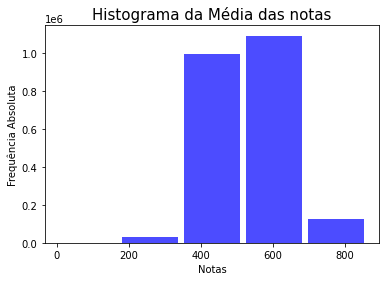

In [ ]:
plt.hist(dados_df['NOTA_MEDIA'], 5, rwidth=0.9, color='blue', alpha=0.7)
plt.title('Histograma da Média das notas', fontsize=15)
plt.xlabel('Notas')
plt.ylabel('Frequência Absoluta')
plt.show()

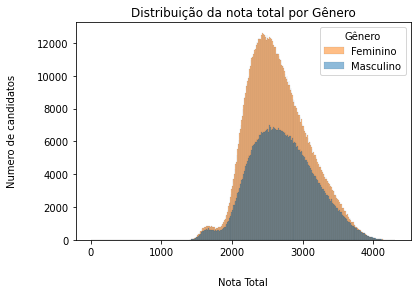

In [ ]:
fig, ax = plt.subplots()

g = sns.histplot(data = dados_df , x = 'NOTA_TOTAL', hue = 'TP_SEXO')
plt.xlabel('Nota Total', labelpad = 20)
plt.ylabel('Numero de candidatos', labelpad = 20)
plt.legend(['Feminino', 'Masculino'], title = 'Gênero')
plt.title('Distribuição da nota total por Gênero')
plt.show()

In [ ]:
build_table(dados_df, {'TP_SEXO': 'Gênero'}, {'M': 'Masculino', 'F': 'Feminino'})

,Feminino,Masculino
Gênero,1381949,856158


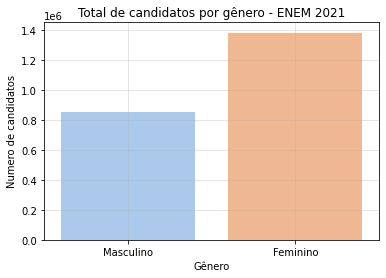

In [ ]:
sns.countplot(data = dados_df, x = 'TP_SEXO', palette = 'pastel')
plt.xticks(ticks = [0,1], labels = ['Masculino', 'Feminino'])
plt.xlabel('Gênero')
plt.ylabel('Numero de candidatos')
plt.title('Total de candidatos por gênero - ENEM 2021')
plt.grid(alpha = 0.4)
plt.show()

Text(0.5, 1.0, 'Total de candidatos por UF e gênero - ENEM 2021')

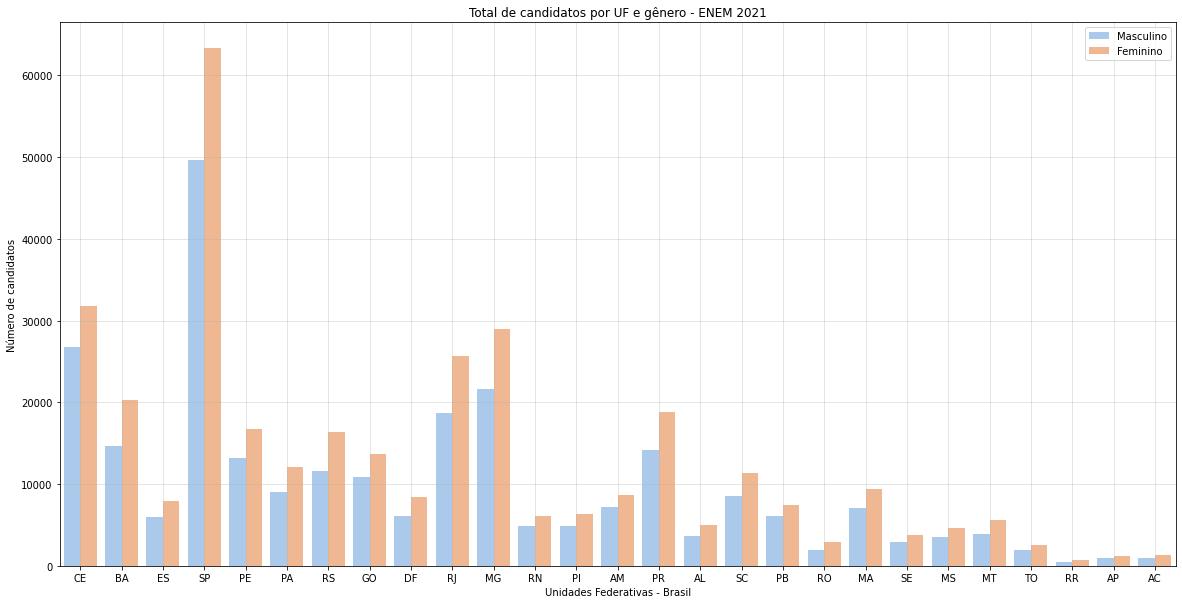

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(data = dados_df, x = 'SG_UF_ESC', hue = 'TP_SEXO', palette = 'pastel')
plt.grid(alpha = 0.4)
plt.legend(labels = ['Masculino', 'Feminino'])
plt.xlabel('Unidades Federativas - Brasil')
plt.ylabel('Número de candidatos')
plt.title('Total de candidatos por UF e gênero - ENEM 2021')

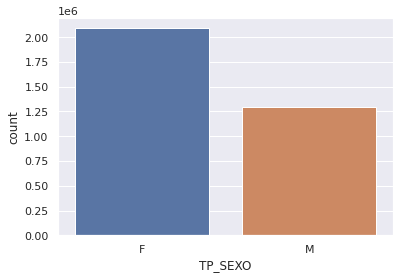

In [ ]:
sns.countplot(x='TP_SEXO', data=df)

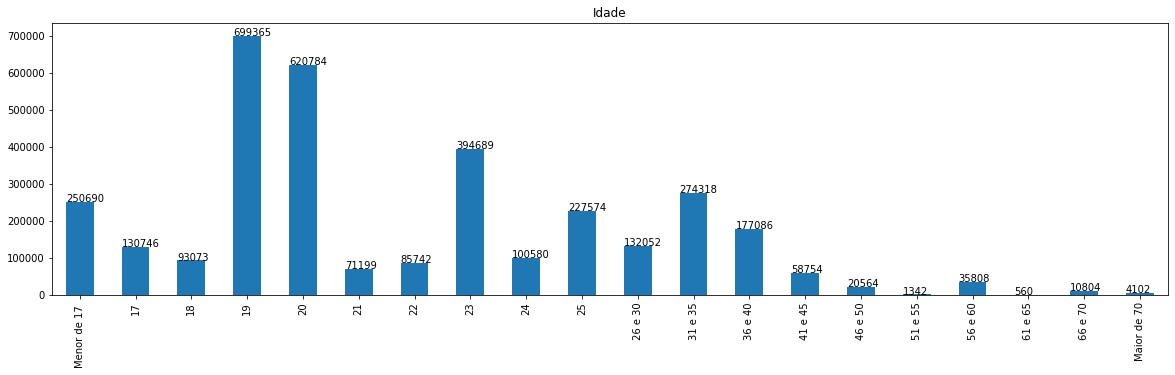

In [ ]:
ax = dados_df['TP_FAIXA_ETARIA'].value_counts(sort=False).plot(title='Idade',kind='bar', figsize=(20,5))
annotate(ax, ['Menor de 17 ','17','18','19','20','21','22','23','24','25','26 e 30','31 e 35','36 e 40','41 e 45','46 e 50','51 e 55', '56 e 60','61 e 65','66 e 70', 'Maior de 70'])


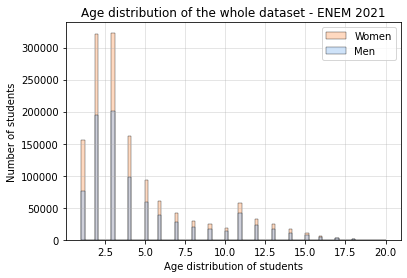

In [ ]:
sns.histplot(data = dados_df, x = 'TP_FAIXA_ETARIA', bins = 91, palette = 'pastel', hue = 'TP_SEXO')
plt.xlabel('Age distribution of students')
plt.ylabel('Number of students')
plt.title('Age distribution of the whole dataset - ENEM 2021')
plt.legend(labels = ['Women', 'Men'])
plt.grid(alpha = 0.4)

In [ ]:
plot_distribution(df, "TP_FAIXA_ETARIA")

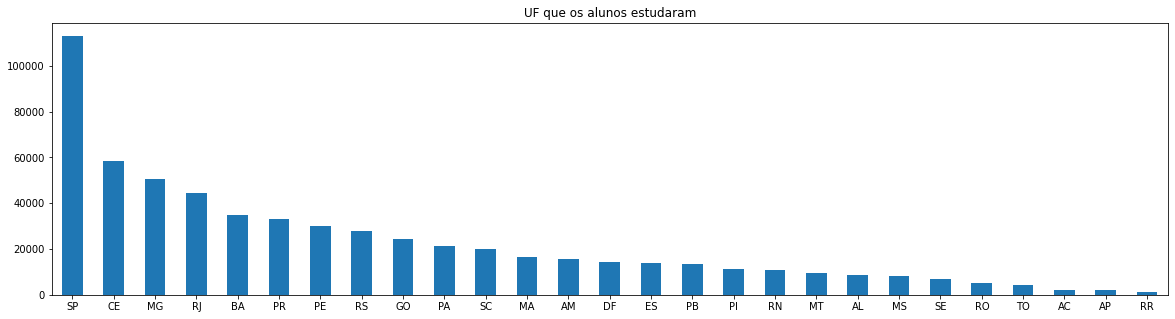

In [ ]:
dados_df['SG_UF_ESC'].value_counts().plot(title='UF que os alunos estudaram',kind='bar', figsize=(20,5), rot=0)

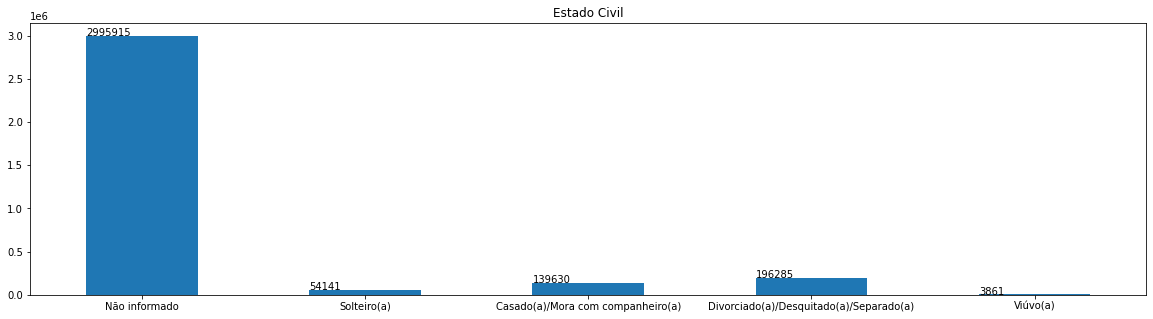

In [ ]:
ax = dados_df['TP_ESTADO_CIVIL'].value_counts(sort=False).plot(title='Estado Civil',kind='bar', figsize=(20,5), rot=0)
annotate(ax, ['Não informado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'])

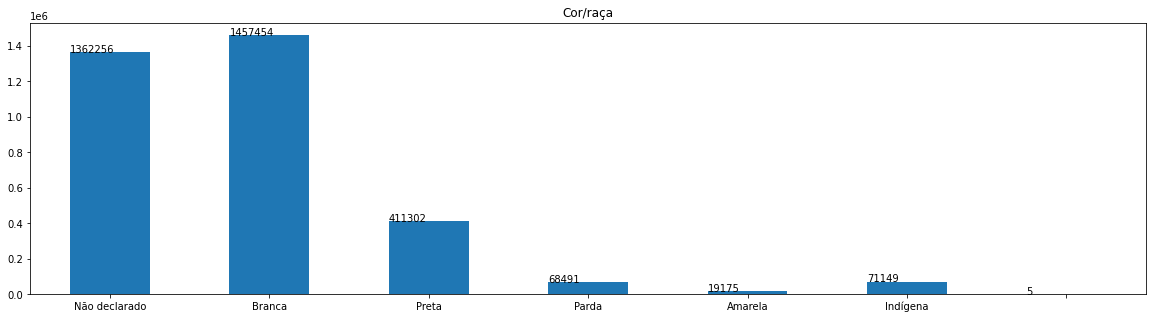

In [ ]:
ax = dados_df['TP_COR_RACA'].value_counts(sort=False).plot(title='Cor/raça', kind='bar', figsize=(20,5), rot=0)
annotate(ax, ['Não declarado','Branca','Preta','Parda','Amarela','Indígena'])

Text(0.5, 0, 'Não declarado 0 - Branca 1 - Preta 2 - Parda 3 - Amarela 4 - Indígena 5 - Sem Info 6')

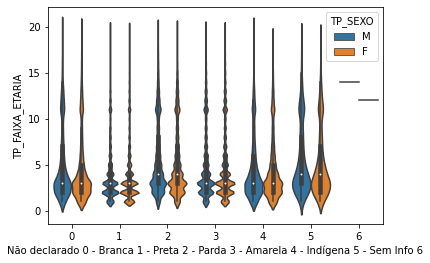

In [ ]:
sns.violinplot(data = dados_df, x = 'TP_COR_RACA', y = 'TP_FAIXA_ETARIA', hue = 'TP_SEXO')
plt.xlabel('Não declarado 0 - Branca 1 - Preta 2 - Parda 3 - Amarela 4 - Indígena 5 - Sem Info 6')

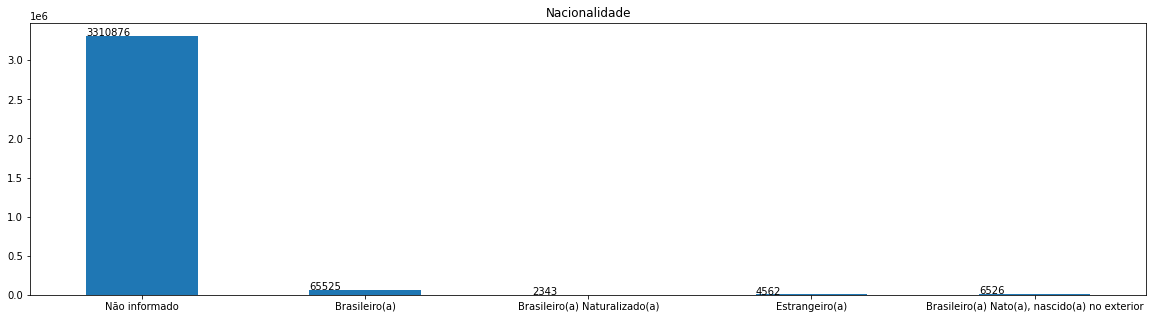

In [ ]:
ax = df['TP_NACIONALIDADE'].value_counts(sort=False).plot(title='Nacionalidade', kind='bar', figsize=(20,5), rot=0)
annotate(ax, ['Não informado', 'Brasileiro(a)', 'Brasileiro(a) Naturalizado(a)', 'Estrangeiro(a)', 'Brasileiro(a) Nato(a), nascido(a) no exterior'])

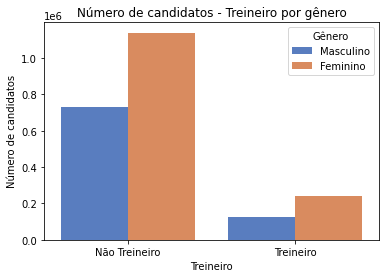

In [ ]:
g = sns.countplot(data = dados_df, x = 'IN_TREINEIRO', hue = 'TP_SEXO', palette = 'muted')
plt.legend(['Masculino', 'Feminino'], title = 'Gênero')
plt.xlabel('Treineiro')
plt.xticks(ticks = [0,1], labels = ['Não Treineiro', 'Treineiro'])
plt.ylabel('Número de candidatos')
plt.title('Número de candidatos - Treineiro por gênero')
plt.show()

In [ ]:
build_table(dados_df, {'IN_TREINEIRO': 'Treineiro'}, {0: 'Não Treineiro', 1: 'Treineiro'})

,Não Treineiro,Treineiro
Treineiro,1870734,367373


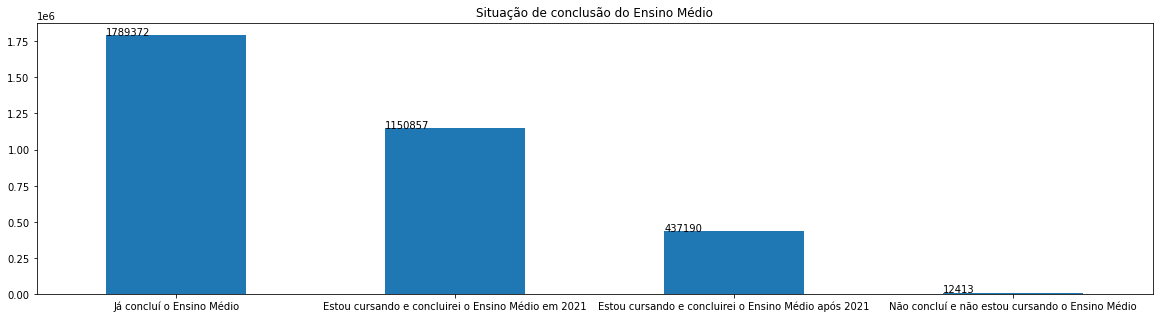

In [ ]:
ax = dados_df['TP_ST_CONCLUSAO'].value_counts(sort=False).plot(title='Situação de conclusão do Ensino Médio', kind='bar', figsize=(20,5), rot=0)
annotate(ax, ['Já concluí o Ensino Médio', 'Estou cursando e concluirei o Ensino Médio em 2021', 'Estou cursando e concluirei o Ensino Médio após 2021', 'Não concluí e não estou cursando o Ensino Médio'])

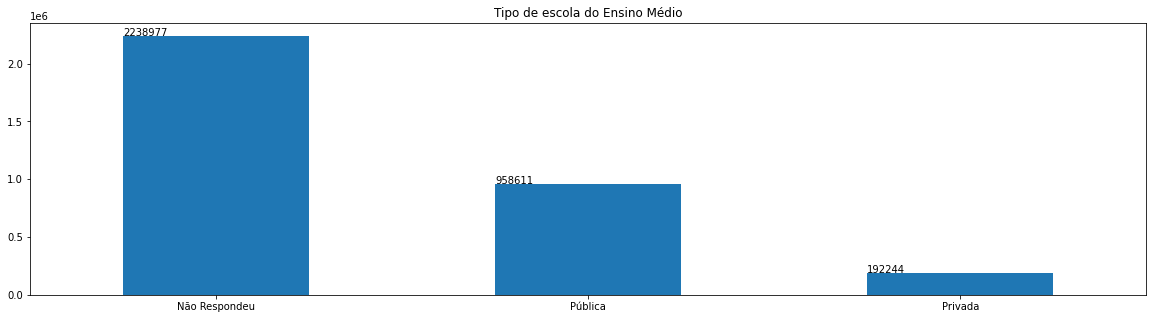

In [ ]:
ax = dados_df['TP_ESCOLA'].value_counts(sort=False).plot(title='Tipo de escola do Ensino Médio',kind='bar', figsize=(20,5), rot=0)
annotate(ax, ['Não Respondeu', 'Pública', 'Privada', 'Exterior'])

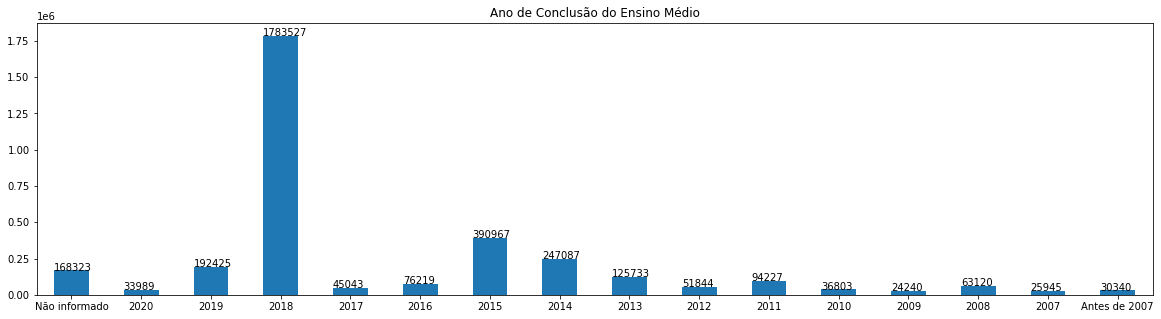

In [ ]:
ax = dados_df['TP_ANO_CONCLUIU'].value_counts(sort=False).plot(title='Ano de Conclusão do Ensino Médio', kind='bar', figsize=(20,5), rot=0)
annotate(ax, ['Não informado', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', 'Antes de 2007'])

In [ ]:
ax = dados_df['IN_TREINEIRO'].value_counts(sort=False).plot(title='Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos', kind='bar', figsize=(20,5), rot=0)
annotate(ax, ['Não', 'Sim'])

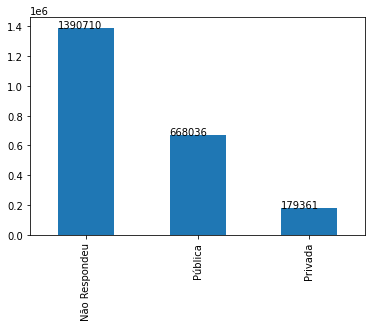

In [ ]:
ax = dados_df.TP_ESCOLA.value_counts().plot(kind='bar')
annotate(ax, ['Não Respondeu', 'Pública', 'Privada'])
plt.show()

# 04. Avaliação das Notas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


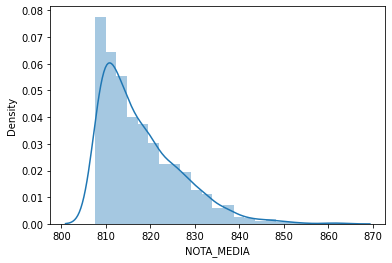

In [ ]:
# nota do milésimo aluno
top_notas = dados_df.NOTA_MEDIA.nlargest(1000)

# distribuição das 1000 melhores médias
sns.distplot(top_notas)

In [ ]:
top_notas.head(20)

604348     862.68
2513764    859.96
1252845    854.24
557854     851.32
334699     851.04
2205416    849.14
2056249    848.64
1170579    847.50
508491     846.66
2646180    846.10
110346     845.98
1017378    845.40
1188266    845.04
230836     843.64
521501     842.66
1005051    842.44
982969     842.32
512519     842.20
743301     841.38
152259     840.84
Name: NOTA_MEDIA, dtype: float64

In [ ]:
# menor das 1000 notas
nota_corte = top_notas.min()
nota_corte

807.5600000000001

In [ ]:
# Redação
pub_redacao = dados_df.loc[dados_df.TP_ESCOLA==2, 'NU_NOTA_REDACAO']  # Pública
priv_redacao = dados_df.loc[dados_df.TP_ESCOLA==3, 'NU_NOTA_REDACAO'] # Privada

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


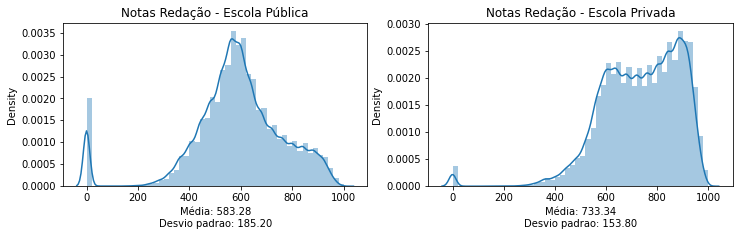

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

p1=sns.distplot(
    pub_redacao,
    ax=axes[0],
    axlabel=f'Média: {pub_redacao.mean():.2f}\nDesvio padrao: {pub_redacao.std():.2f}'
).set_title("Notas Redação - Escola Pública")
p2=sns.distplot(
    priv_redacao,
    axlabel=f'Média: {priv_redacao.mean():.2f}\nDesvio padrao: {priv_redacao.std():.2f}'
).set_title("Notas Redação - Escola Privada")
plt.show()

In [ ]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
dados_df[provas].plot.box(grid = True)

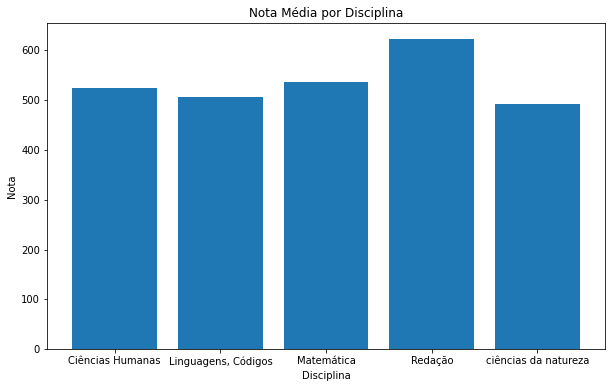

In [ ]:
notas_medias={'ciências da natureza':np.mean(dados_df['NU_NOTA_CN']),
              'Ciências Humanas':np.mean(dados_df['NU_NOTA_CH']),
              'Linguagens, Códigos':np.mean(dados_df['NU_NOTA_LC']),
              'Matemática':np.mean(dados_df['NU_NOTA_MT']),
              'Redação':np.mean(dados_df['NU_NOTA_REDACAO'])}
lists = sorted(notas_medias.items()) 

x1, y1 = zip(*lists) 
plt.figure(figsize=(10,6))

plt.bar(x1, y1)
plt.title('Nota Média por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.show()

In [ ]:
nota_corte = dados_df.NOTA_MEDIA.nlargest(round(len(dados_df)*0.05)).min()
base_melhores_notas = dados_df[dados_df.NOTA_MEDIA >= nota_corte]

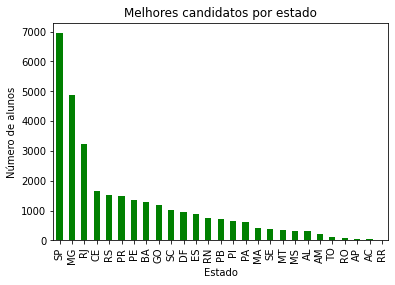

In [ ]:
 #Melhores alunos - numero de alunos por estado
base_melhores_notas.SG_UF_ESC.value_counts().plot.bar(color='green')
plt.title('Melhores candidatos por estado')
plt.xlabel('Estado')
plt.ylabel('Número de alunos')
plt.show()

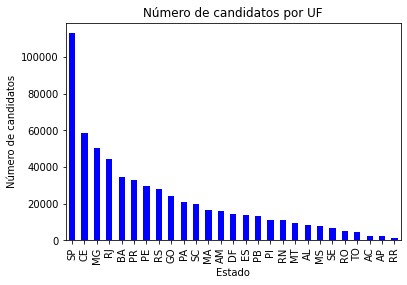

In [ ]:
dados_df.SG_UF_ESC.value_counts().plot.bar(color='blue')
plt.title('Número de candidatos por UF')
plt.xlabel('Estado')
plt.ylabel('Número de candidatos')
plt.show()

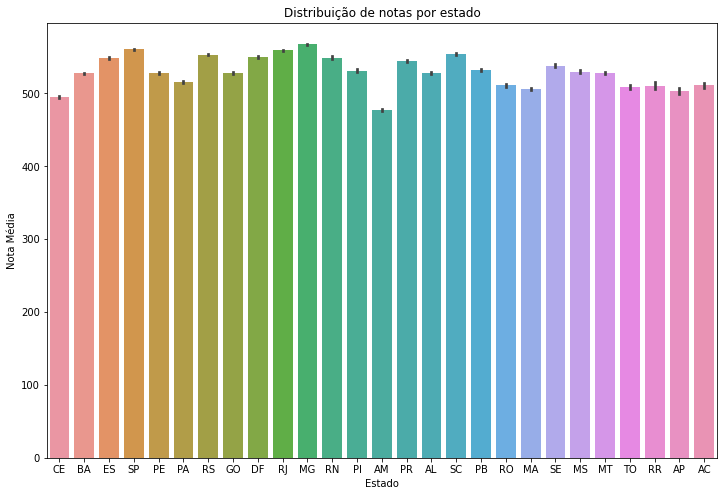

In [ ]:
plt.figure(figsize=(12,8))

sns.barplot(
    x="SG_UF_ESC",
    y="NOTA_MEDIA",
    data=dados_df, 
    )
plt.title("Distribuição de notas por estado")
plt.xlabel('Estado')
plt.ylabel('Nota Média')
plt.show()

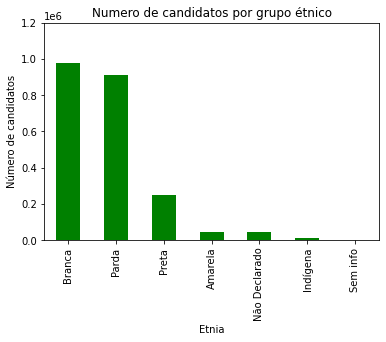

In [ ]:
#numero por etnia
base_TP_COR_RACA = pd.Series(dados_df.TP_COR_RACA, dtype='category').cat.rename_categories({3:'Parda', 2:'Preta', 1:'Branca', 0:'Não Declarado', 4:'Amarela', 5:'Indígena', 6:'Sem info'})
base_TP_COR_RACA.value_counts().plot.bar(color='green')
plt.title('Numero de candidatos por grupo étnico')
plt.xlabel('Etnia')
plt.ylabel('Número de candidatos')
plt.ylim(bottom=-0, top=1200000)
plt.show()

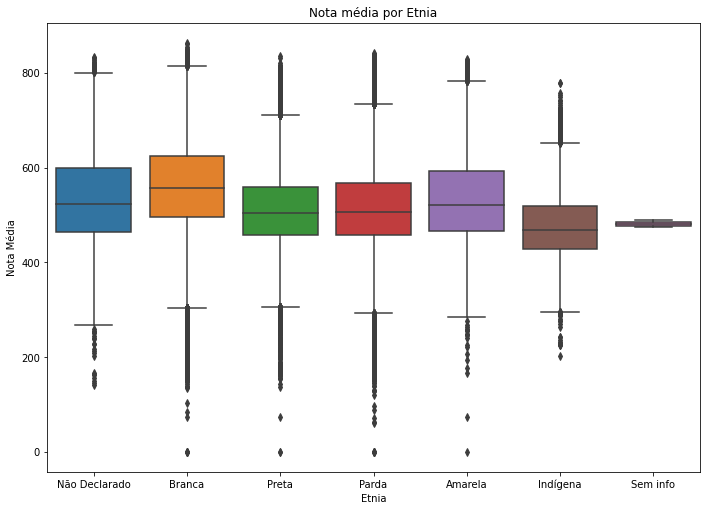

In [ ]:
#notas por Etnia
fig, ax = plt.subplots()
sns.boxplot(x = 'TP_COR_RACA', y = 'NOTA_MEDIA', data = dados_df)
plt.title("Nota média por Etnia")
plt.xlabel('Etnia')
plt.ylabel('Nota Média')
fig.set_size_inches(11.7, 8.27)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


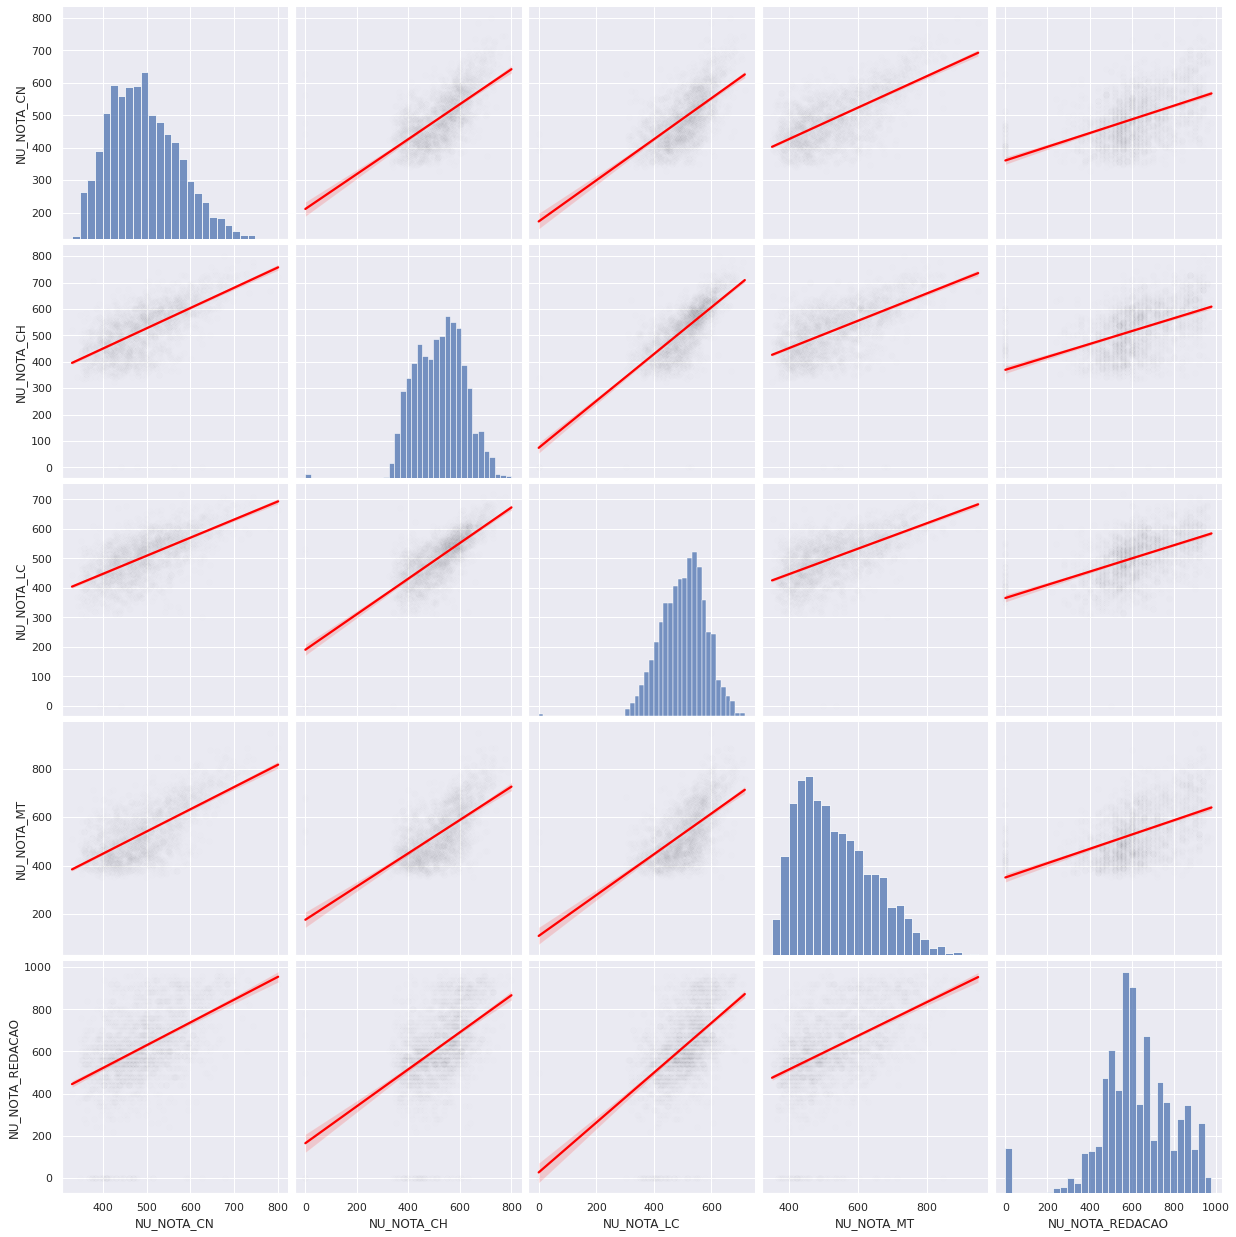

In [ ]:
# Correlação entre as notas?
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
# colunas = ['TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'Q001', 'Q002', 'Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Como a quantidade de dados é muito elevada, os gráficos de correlação demoram muito para serem calculados e ficam saturados
# Uma solução sistemática é realizar uma subamostragem da população [aqui, um milésimo da população]
amostra = dados_df.sample(frac=0.001, random_state=123)
len(amostra)

sns.set()
sns.pairplot(amostra[colunas], size = 3.5, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.005}})
# defino um alpha muito baixo devido ao grande número de pontos, para limitar o efeito de saturação
plt.show()

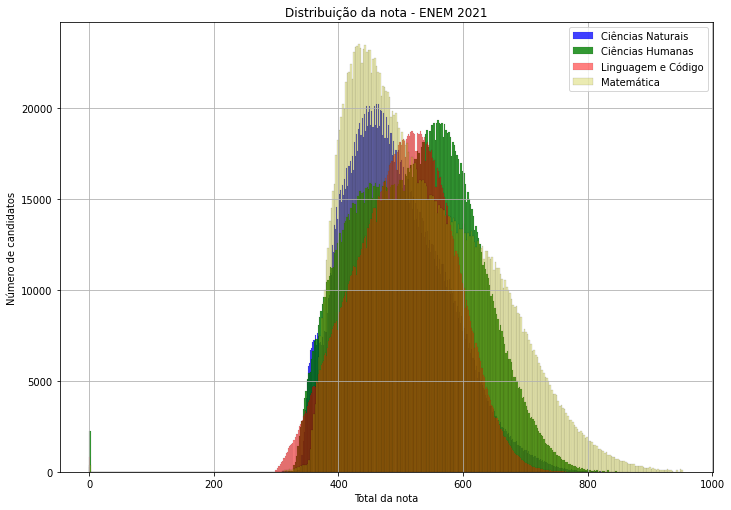

In [ ]:
fig, ax = plt.subplots()

sns.histplot(data = dados_df, x = 'NU_NOTA_CN', label = 'Ciências Naturais', legend = True, color = 'b')
sns.histplot(data = dados_df, x = 'NU_NOTA_CH', label = 'Ciências Humanas', legend = True, color = 'g', alpha = 0.8)
sns.histplot(data = dados_df, x = 'NU_NOTA_LC', label = 'Linguagem e Código', legend = True, color = 'r', alpha = 0.5)
sns.histplot(data = dados_df, x = 'NU_NOTA_MT', label = 'Matemática', legend = True, color = 'y', alpha = 0.3)
plt.legend()
plt.xlabel('Total da nota')
plt.ylabel('Número de candidatos')
plt.title('Distribuição da nota - ENEM 2021')
fig.set_size_inches(11.7, 8.27)
plt.grid()

Text(0.5, 1.0, 'Na sua residência tem acesso à Internet?')

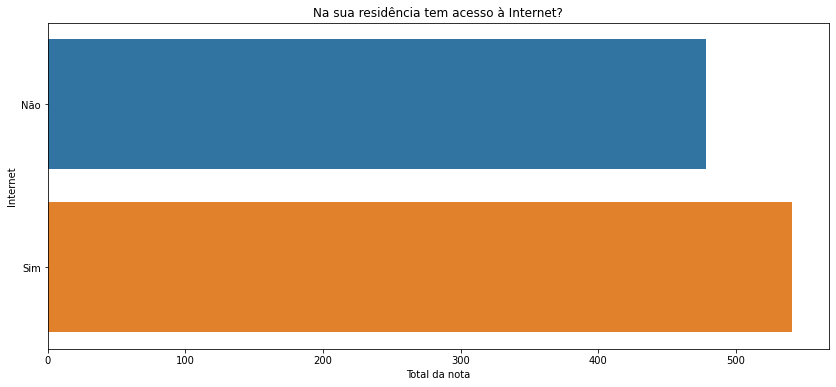

In [ ]:
plt.figure(figsize = (14,6))
mean_internet_grades = dados_df.groupby("Q025").mean()["NOTA_MEDIA"].reset_index()
mean_internet_grades["Q025"] = ["Não","Sim"]
sns.barplot(data = mean_internet_grades, x ="NOTA_MEDIA" , y = "Q025", orient = "h" );
plt.xlabel('Total da nota')
plt.ylabel('Internet')
plt.title('Na sua residência tem acesso à Internet?')

In [ ]:
build_table(dados_df, {'Q025': 'Internet em casa'}, {'A': 'Não ', 'B': 'Sim'})

,Sim,Não
Internet em casa,2048739,189367


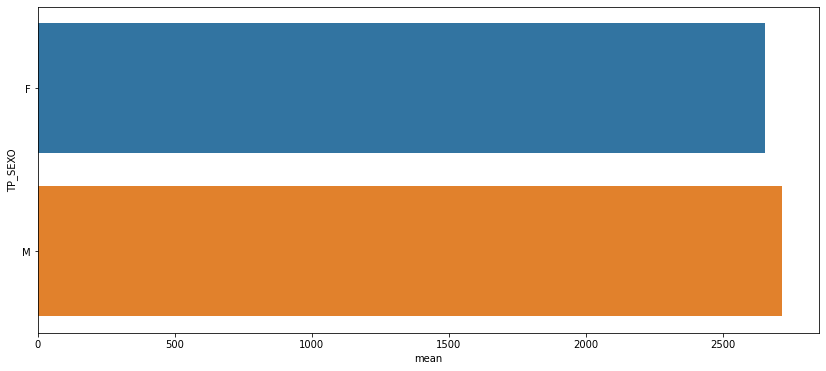

In [ ]:
plt.figure(figsize = (14,6))
mean_grade_by_gender = dados_df.groupby("TP_SEXO").describe()["NOTA_TOTAL"]["mean"].reset_index()
sns.barplot(data = mean_grade_by_gender, x = "mean", y = "TP_SEXO", orient = "h",);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


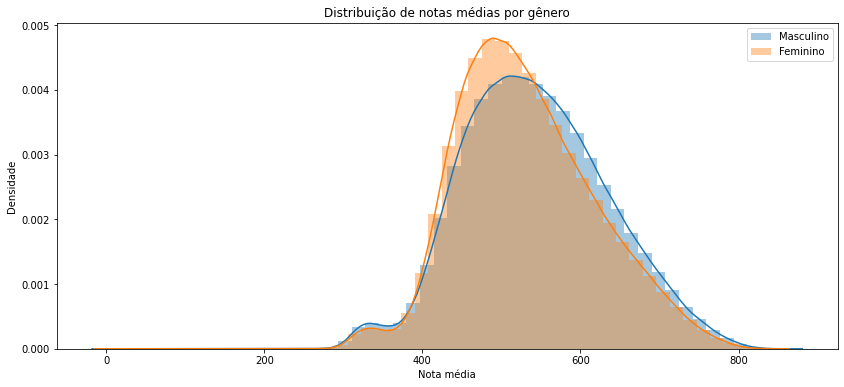

In [ ]:
plt.figure(figsize = (14,6))
female_grades = dados_df[dados_df["TP_SEXO"] == "F"]["NOTA_MEDIA"]
male_grades = dados_df[dados_df["TP_SEXO"] == "M"]["NOTA_MEDIA"]
sns.distplot(male_grades, label = "Masculino");
sns.distplot(female_grades, label = "Feminino");
plt.xlabel('Nota média')
plt.ylabel('Densidade')
plt.title('Distribuição de notas médias por gênero')
plt.legend();

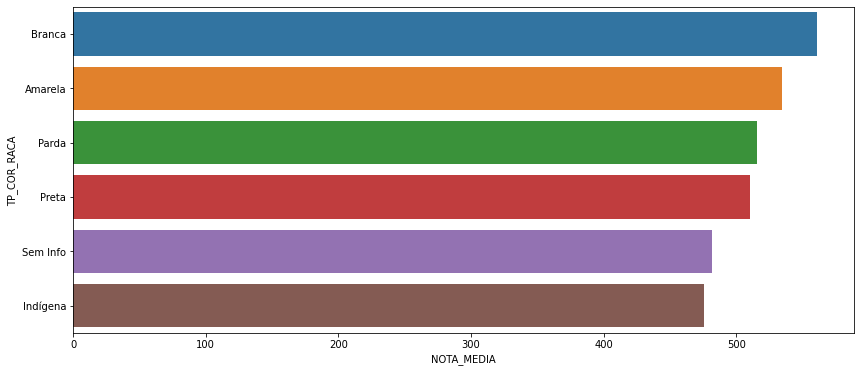

In [ ]:
plt.figure(figsize = (14,6))
mean_grade_by_race = dados_df.groupby("TP_COR_RACA").mean()["NOTA_MEDIA"]
mean_grade_by_race = mean_grade_by_race.rename(index = {0:"Não declarado", 1:"Branca", 2:"Preta",3:"Parda" , 4:"Amarela", 5:"Indígena", 6:"Sem Info"}).reset_index()
mean_grade_by_race = mean_grade_by_race[1:].sort_values(by = "NOTA_MEDIA", ascending = False)
sns.barplot(data = mean_grade_by_race,x = "NOTA_MEDIA" , y = "TP_COR_RACA", orient = "h");

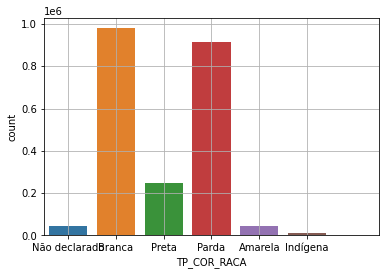

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data = dados_df, x = 'TP_COR_RACA')
plt.xticks(ticks = [0,1,2,3,4,5], labels = ['Não declarado','Branca','Preta','Parda','Amarela','Indígena'])
plt.grid()
plt.show()